In [2]:
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import seaborn as sns
dt = pd.read_csv('deepsolar_tract.csv'  , encoding = 'cp1252')

My name is Eric Tran and this is my project discussing solar panels, solar energy and looking for a correlation about what kind of audience would buy solar panels.



In [3]:
dt.head()

,Unnamed: 0,tile_count,solar_system_count,total_panel_area,fips,average_household_income,county,education_bachelor,education_college,education_doctoral,...,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
0,0,0.0,0.0,0.000000,27145011200,70352.789869,Stearns County,569,1690,13,...,39,11,13,34,0,0,25,12,0,9.46
1,1,25.0,21.0,1133.436461,27145011301,61727.085202,Stearns County,674,1434,108,...,39,11,13,34,0,0,25,12,0,9.46
2,2,3.0,3.0,64.505776,27145011302,71496.886583,Stearns County,854,1459,31,...,39,11,13,34,0,0,25,12,0,9.46
3,3,0.0,0.0,0.000000,27145011304,86840.152755,Stearns County,640,1116,68,...,39,11,13,34,0,0,25,12,0,9.46
4,4,5.0,5.0,164.583303,27145011400,89135.315597,Stearns County,654,1314,15,...,39,11,13,34,0,0,25,12,0,9.46


In [4]:
dt.tail()

,Unnamed: 0,tile_count,solar_system_count,total_panel_area,fips,average_household_income,county,education_bachelor,education_college,education_doctoral,...,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
72532,72533,1.0,1.0,40.277124,8049000202,90163.611860,Grand County,1612,1419,3,...,50,12,15,11,0,0,10,11,0,9.82
72533,72534,0.0,0.0,0.000000,40085094100,45124.153006,Love County,95,441,0,...,19,1,7,19,0,0,0,0,0,7.86
72534,72535,1.0,1.0,21.902255,40085094200,60878.458738,Love County,426,961,11,...,19,1,7,19,0,0,0,0,0,7.86
72535,72536,0.0,0.0,0.000000,40085094300,56817.996870,Love County,134,355,5,...,19,1,7,19,0,0,0,0,0,7.86
72536,72537,3.0,2.0,224.947000,48327950300,50221.556257,Menard County,137,457,0,...,54,3,5,0,0,0,36,0,0,8.66


In [5]:
dt.columns

Index(['Unnamed: 0', 'tile_count', 'solar_system_count', 'total_panel_area',
       'fips', 'average_household_income', 'county', 'education_bachelor',
       'education_college', 'education_doctoral',
       ...
       'incentive_count_nonresidential', 'incentive_residential_state_level',
       'incentive_nonresidential_state_level', 'net_metering', 'feedin_tariff',
       'cooperate_tax', 'property_tax', 'sales_tax', 'rebate',
       'avg_electricity_retail_rate'],
      dtype='object', length=169)

In [6]:
dt.describe()

,Unnamed: 0,tile_count,solar_system_count,total_panel_area,fips,average_household_income,education_bachelor,education_college,education_doctoral,education_high_school_graduate,...,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
count,72537.000000,72537.000000,72537.000000,72537.000000,7.253700e+04,71651.000000,72537.000000,72537.000000,72537.000000,72537.000000,...,72537.000000,72537.000000,72537.000000,72537.000000,72537.000000,72537.000000,72537.000000,72537.000000,72537.000000,72537.000000
mean,36268.180404,30.255787,20.217958,1333.547680,2.794758e+10,73314.418095,536.095689,842.039621,38.138178,804.067193,...,36.732702,8.084674,10.487806,14.107986,1.240939,0.419579,17.738368,5.645229,2.045025,10.770600
std,20940.028678,86.337406,54.229584,6103.442088,1.579265e+10,37650.268239,457.495174,483.540398,62.432598,470.637801,...,19.501895,4.817726,4.699084,8.656047,3.170263,2.299609,16.327902,9.693884,3.948551,2.563085
min,0.000000,0.000000,0.000000,0.000000,1.001020e+09,6910.984848,0.000000,0.000000,0.000000,0.000000,...,14.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.250000
25%,18134.000000,1.000000,1.000000,11.669079,1.212709e+10,49507.381081,214.000000,506.000000,0.000000,465.000000,...,26.000000,4.000000,7.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.970000
50%,36268.000000,4.000000,3.000000,138.332615,2.716307e+10,64270.939490,411.000000,767.000000,17.000000,737.000000,...,31.000000,7.000000,9.000000,14.000000,0.000000,0.000000,11.000000,0.000000,0.000000,9.660000
75%,54402.000000,22.000000,14.000000,745.015408,4.104303e+10,86523.383304,739.000000,1086.000000,47.000000,1066.000000,...,39.000000,12.000000,15.000000,20.000000,0.000000,0.000000,38.000000,10.000000,0.000000,12.390000
max,72537.000000,4468.000000,1535.000000,592031.075018,5.604595e+10,537130.215827,12753.000000,12487.000000,1395.000000,8765.000000,...,85.000000,17.000000,22.000000,35.000000,11.000000,16.000000,42.000000,40.000000,14.000000,16.650000


In [7]:
dt.index

RangeIndex(start=0, stop=72537, step=1)

In [8]:

solar =[col for col in dt.columns if 'panel' in col]
education = [col for col in dt.columns if 'education' in col]+['dropout_16_19_inschool_rate']
electricity = [col for col in dt.columns if 'electricity' in col]
voting = [col for col in dt.columns if 'voting' in col]
heat = [col for col in dt.columns if 'heat' in col]
residential = [col for col in dt.columns if 'residential' in col]
travel = [col for col in dt.columns if 'travel' in col]
health_insurance = [col for col in dt.columns if 'health_insurance' in col]
iland = ['fips', 'county', 'gini_index','employed', 'land_area', 'population', 'population_density', 'state', 'total_area', 'unemployed', 'water_area','employ_rate']
race = [col for col in dt.columns if 'race' in col]
transportation = [col for col in dt.columns if 'transportation' in col]
occupation = [col for col in dt.columns if 'occup' in col]
house = [col for col in dt.columns if 'hous' in col]
temperature = [col for col in dt.columns if 'temperature' in col]+['frost_days', 'relative_humidity', 'atmospheric_pressure', 'wind_speed',
                                                            'cooling_degree_days']
age = [col for col in dt.columns if 'age' in col]
tax = [col for col in dt.columns if 'tax' in col]+['feedin_tariff', 'rebate']
poverty = [col for col in dt.columns if 'poverty' in col]
dt.drop(solar+education+electricity+voting+heat+residential+travel+health_insurance+iland+race+transportation+occupation+house+temperature+age+tax+poverty, axis = 1)

,Unnamed: 0,tile_count,solar_system_count,per_capita_income,lat,lon,elevation,daily_solar_radiation,diversity,net_metering
0,0,0.0,0.0,26999.0,45.369,-94.282,358.0,3.76,0.046960,34
1,1,25.0,21.0,20951.0,NaN,NaN,NaN,NaN,0.145934,34
2,2,3.0,3.0,28021.0,45.460,-94.425,358.0,3.76,0.009150,34
3,3,0.0,0.0,29275.0,45.507,-94.388,358.0,3.76,0.187334,34
4,4,5.0,5.0,32770.0,45.457,-94.182,358.0,3.76,0.090766,34
5,5,0.0,0.0,25776.0,45.680,-95.010,376.0,3.76,0.081981,34
6,6,2.0,2.0,12750.0,45.555,-94.157,358.0,3.76,0.470443,34
7,7,0.0,0.0,28714.0,45.680,-94.768,358.0,3.76,0.008239,34
8,8,0.0,0.0,26271.0,45.456,-94.626,358.0,3.76,0.029574,34
9,9,11.0,10.0,31691.0,45.612,-94.220,358.0,3.76,0.120052,34


If the tile_count is non-zero, then that data entry is useful to us. We are looking for where solar power is significant and looking at places where the tile_count is zero is another issue that is currenty not our concern.

## Topics of INTEREST

#### 1. Population and Population Density

#### 2. Education / Age (Might just be education if introducing age becomes too difficult)

#### 3. Employment/income, I understand that this point will be more difficult because of the variability of income, 

### Preparation

First, we have to cut through all the columns and rows that aren't useful to our goal. In this step, we're going to just cut out all entries that have no tile_count or solar_system_count (effect is the same).


In [9]:
tiles = dt[dt['tile_count'].astype(int) == 0 ].index
dt = dt.drop(tiles)

Now that we cut 1/4 of the entries, let's cut a bunch of variables, create some simple population graphs and see if there's any correlation between solar_panel_area and such.

In [10]:
dt[['population', 'population_density']]

,population,population_density
1,8020,482.644300
2,6971,186.167300
4,5264,119.632300
6,3504,7818.259000
9,8504,1080.027000
10,7108,834.486100
11,3300,4266.756000
12,8099,1569.037000
14,3956,121.044400
15,3772,3513.968000


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


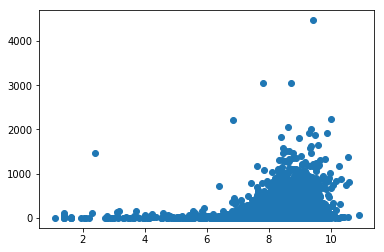

In [11]:
plt.scatter(x = np.log(dt['population']),y = dt['tile_count'])

In [12]:
dt['electricity_consume_total'].describe(percentiles = np.arange(0,1,0.25))

count    5.625800e+04
mean     2.521421e+05
std      1.114772e+06
min      2.080200e+04
0%       2.080200e+04
25%      5.702800e+04
50%      9.581800e+04
75%      2.271940e+05
max      1.988044e+07
Name: electricity_consume_total, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1203: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1205: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1239: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (se

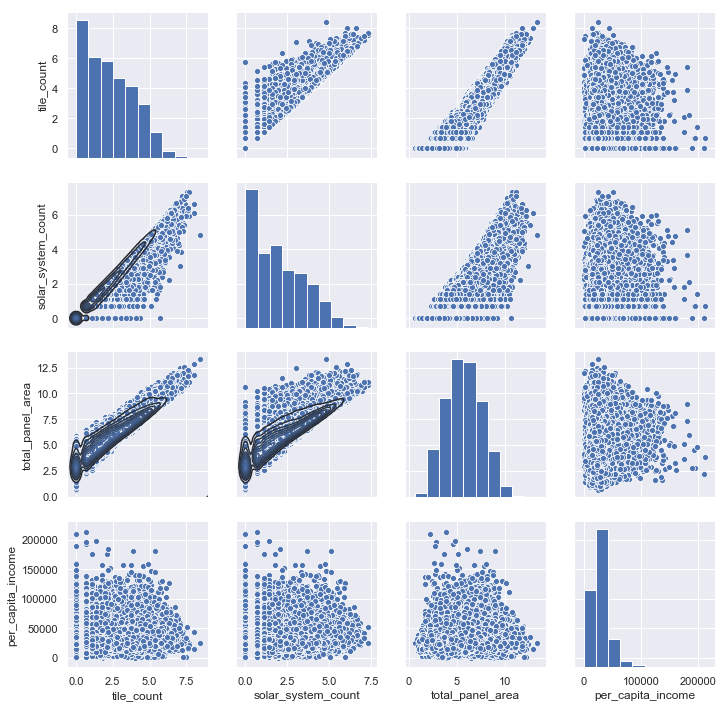

In [31]:
#scatterplot
sns.set()
cols = ['tile_count','solar_system_count','total_panel_area']
dt1 = np.log(dt[cols].astype(float))
dt1['per_capita_income'] = dt['per_capita_income']
g = sns.pairplot(dt1, size = 2.5)
g = g.map_lower(sns.kdeplot)
plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


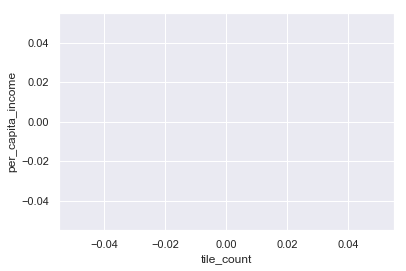

In [33]:
sns.kdeplot(dt['tile_count'],dt['per_capita_income'])